In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

In [2]:
nifty = pd.read_csv("C://Users//Rohit Mhatre//Downloads//NIFTY_EOD_data.csv")

In [3]:
nifty['Date'] = pd.to_datetime(nifty['Date'],format='%Y-%m-%d')

In [4]:
nifty = nifty.sort_values(by='Date',ascending=True)

In [5]:
nifty.isnull().sum()

Date                             0
Exchange                         0
Open Price                       0
High Price                       0
Low Price                        0
Close                            0
Last Traded Price                0
Previous Close                   0
Traded Volume                  229
Traded Value                   229
Total No Of Trades            4665
Unadjusted Open Price            0
Unadjusted High Price            0
Unadjusted Low Price             0
Unadjusted Previous Close        0
Unadjusted Last Price            0
Unadjusted Close Price           0
Unadjusted Traded Quantity     231
Delivery Volume               4665
Delivery Turnover             4665
Delivery                      4665
Delivery Percentage           4665
dtype: int64

In [6]:
nifty.set_index('Date',inplace=True)

In [7]:
nifty.drop(['Exchange','Last Traded Price','Unadjusted Open Price', 'Unadjusted High Price',
       'Unadjusted Low Price', 'Unadjusted Previous Close',
       'Unadjusted Last Price', 'Unadjusted Close Price',
       'Unadjusted Traded Quantity','Delivery Turnover',
       'Delivery','Total No Of Trades','Delivery Volume','Delivery Percentage'],axis=1,inplace=True)

In [8]:
nifty.isnull().sum()

Open Price          0
High Price          0
Low Price           0
Close               0
Previous Close      0
Traded Volume     229
Traded Value      229
dtype: int64

In [9]:
nifty.rename(columns={'Open Price':'Open','High Price':'High','Low Price':'Low'},inplace=True)

In [10]:
nifty.dropna(axis=0,inplace=True)

In [11]:
nifty.isnull().sum()

Open              0
High              0
Low               0
Close             0
Previous Close    0
Traded Volume     0
Traded Value      0
dtype: int64

In [12]:
nifty.to_csv("C://Users//Rohit Mhatre//Downloads//cleaned.csv")

In [13]:
nifty_filtered = nifty.loc['2006-01-02':'2017-01-02']
x = nifty_filtered.drop('Close',axis=1)
y = nifty_filtered['Close']


In [14]:
y.describe()

count    2712.000000
mean     5634.867478
std      1648.437488
min      2524.200000
25%      4516.200000
50%      5414.000000
75%      6421.637500
max      8996.250000
Name: Close, dtype: float64

C:\Users\Rohit Mhatre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


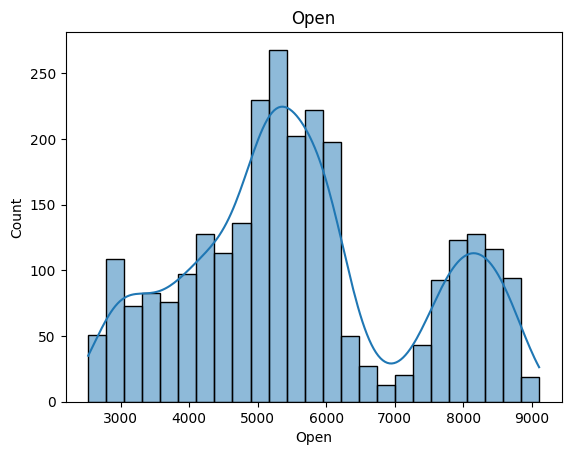

C:\Users\Rohit Mhatre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


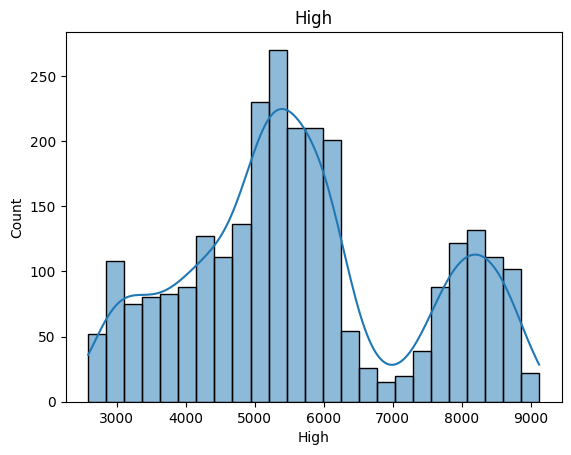

C:\Users\Rohit Mhatre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


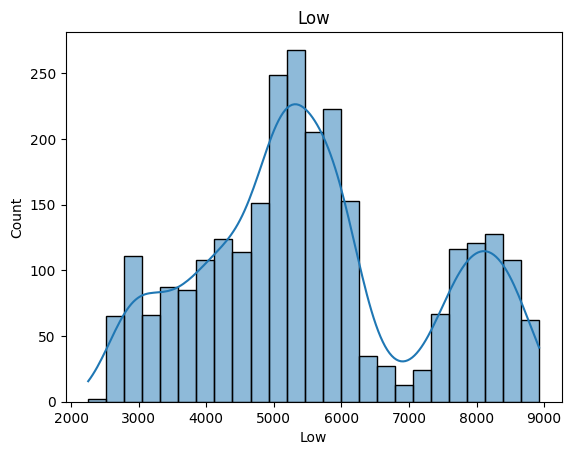

C:\Users\Rohit Mhatre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


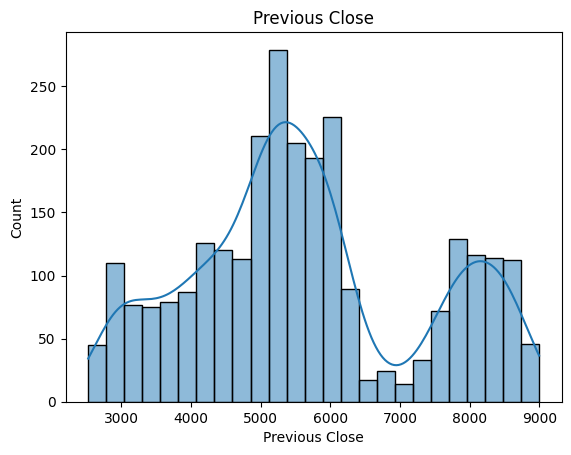

C:\Users\Rohit Mhatre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


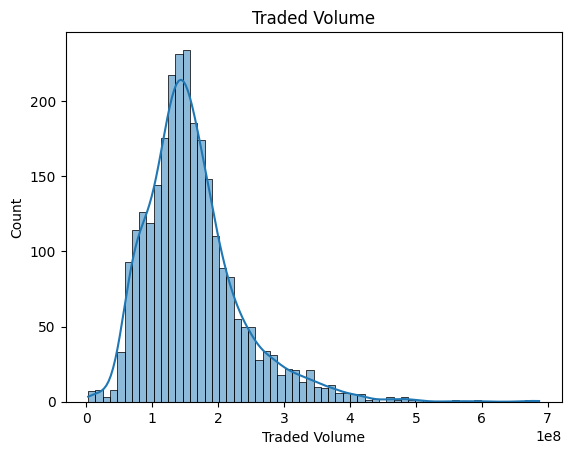

C:\Users\Rohit Mhatre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


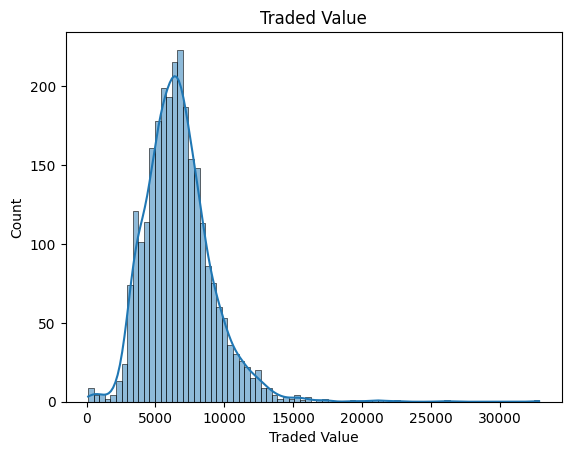

In [15]:
for col in x.columns:
    plt.figure()
    sns.histplot(x[col],kde=True)
    plt.title(f"{col}")
    plt.show()

In [16]:
import  scipy.stats as stats

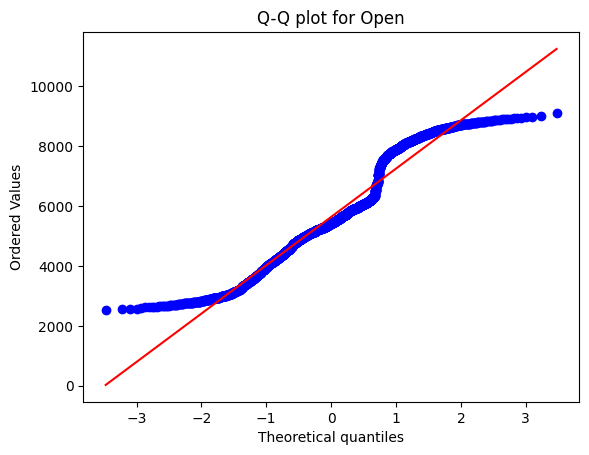

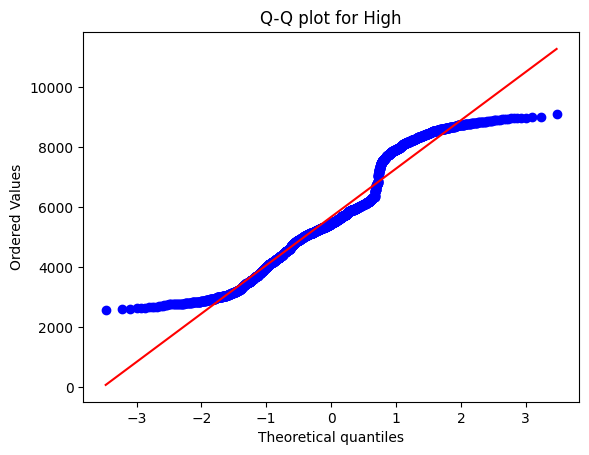

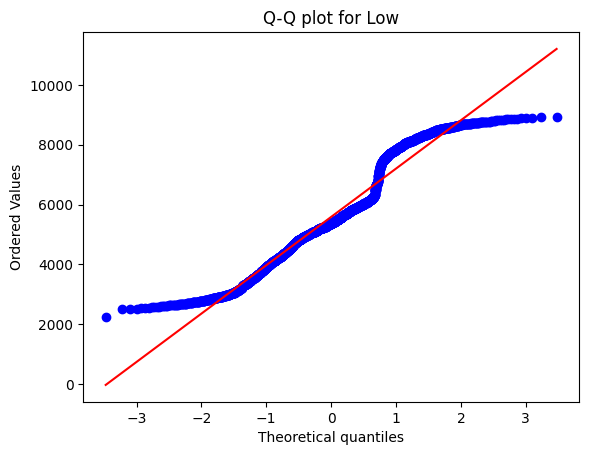

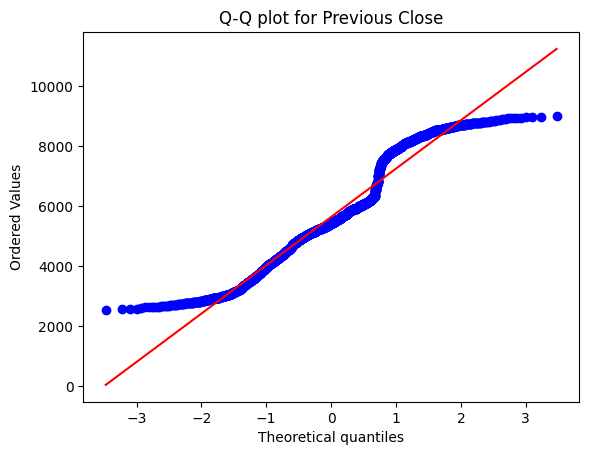

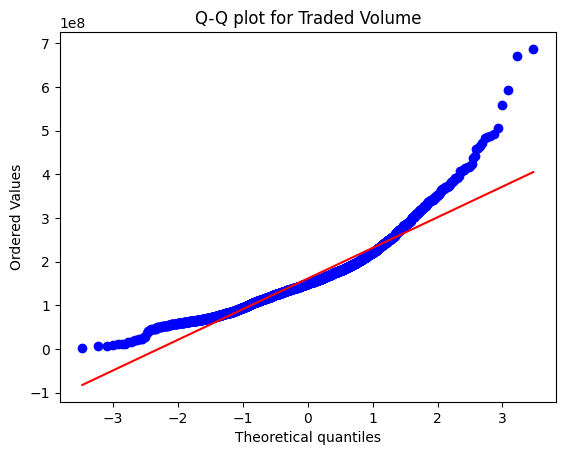

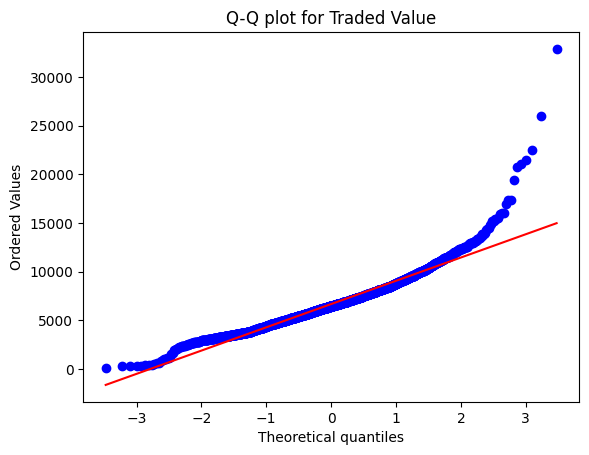

In [17]:
for col in x.columns:
    plt.figure()
    stats.probplot(x[col],dist='norm',plot=plt)
    plt.title(f'Q-Q plot for {col}')
    plt.show()


In [18]:
from scipy.stats import shapiro , kstest

In [19]:
print('Shapiro Test')
for col in x.columns:
    stat , p_value = shapiro(x[col])
    print(f"{col}: p-value = {p_value}")
print(' ')
print('Kolmogorov-Smirnov Test')
for column in x.columns:
    stat, p_value = kstest(x[column], 'norm')
    print(f'{column}: p-value = {p_value}')

Shapiro Test
Open: p-value = 1.4812927851683637e-28
High: p-value = 9.271806521591062e-29
Low: p-value = 2.0579497939213073e-28
Previous Close: p-value = 1.3413596506046696e-28
Traded Volume: p-value = 1.7957964921566254e-36
Traded Value: p-value = 6.211810357311624e-34
 
Kolmogorov-Smirnov Test
Open: p-value = 0.0
High: p-value = 0.0
Low: p-value = 0.0
Previous Close: p-value = 0.0
Traded Volume: p-value = 0.0
Traded Value: p-value = 0.0


In [20]:
print(x.skew())
print(x.kurtosis())

Open              0.298228
High              0.299251
Low               0.294431
Previous Close    0.297287
Traded Volume     1.428716
Traded Value      1.480089
dtype: float64
Open             -0.737553
High             -0.736753
Low              -0.741365
Previous Close   -0.737252
Traded Volume     4.105453
Traded Value      8.276812
dtype: float64


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor , Ridge
from sklearn.pipeline import Pipeline

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, shuffle=False)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [26]:
gradient = SGDRegressor(random_state=42)
parameters = {
    'penalty' : ['l2'],
    'alpha' : [0.0001,0.001,0.01,0.1],
    'tol' : [1e-3,1e-4,1e-5],
    'max_iter' : [1000,5000,10000]
}
grid_model = GridSearchCV(estimator=gradient,param_grid = parameters,cv=5,scoring='neg_mean_squared_error')
grid_model.fit(x_train_scaled,y_train)


GridSearchCV(cv=5, estimator=SGDRegressor(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'max_iter': [1000, 5000, 10000], 'penalty': ['l2'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='neg_mean_squared_error')

In [27]:
grid_model.best_params_

{'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.001}

In [28]:
model = grid_model.best_estimator_
y_pred = model.predict(x_test_scaled)

In [29]:
model.coef_

array([ 894.90804655,  992.32961115, 1115.64688547,  900.80914912,
        -37.91110134,   66.98733699])

In [30]:
print(y_pred.shape)
print(y_test.shape)

(678,)
(678,)


In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 37.49
Mean Squared Error: 2422.31
R2 Score: 0.99


In [33]:
pd.DataFrame({'y_pred':y_pred,'y_test':y_test})

,y_pred,y_test
Date,,
2014-03-07,6445.665975,6526.65
2014-03-10,6518.254238,6537.25
2014-03-11,6529.009109,6511.90
2014-03-12,6505.803817,6516.90
2014-03-13,6512.748575,6493.10
...,...,...
2016-12-27,7934.605564,8032.85
2016-12-28,8043.739612,8034.85
2016-12-29,8042.717313,8103.60


In [34]:
y_train_pred = model.predict(x_train_scaled)

mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)


print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 36.55
Mean Squared Error: 2574.03
R2 Score: 1.00


In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
scores = cross_val_score(model,x_train_scaled,y_train,cv=5,scoring='neg_mean_squared_error')
mse_scores = -scores
print(f"Cross-Validated MSE Scores: {mse_scores:}")
print(f"Mean MSE: {mse_scores.mean():.2f}")

Cross-Validated MSE Scores: [1598.97339209 5480.98862923 2641.77801195 1772.90401237 1484.17609799]
Mean MSE: 2595.76


Residual Analysis

In [37]:
residual = y_test-y_pred

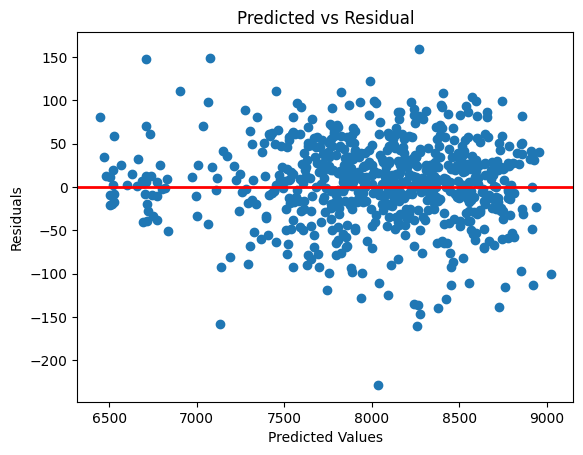

In [38]:
plt.scatter(y_pred,residual)
plt.axhline(0,color='red',linewidth=2)
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.title('Predicted vs Residual')
plt.show()

C:\Users\Rohit Mhatre\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Close', ylabel='Count'>

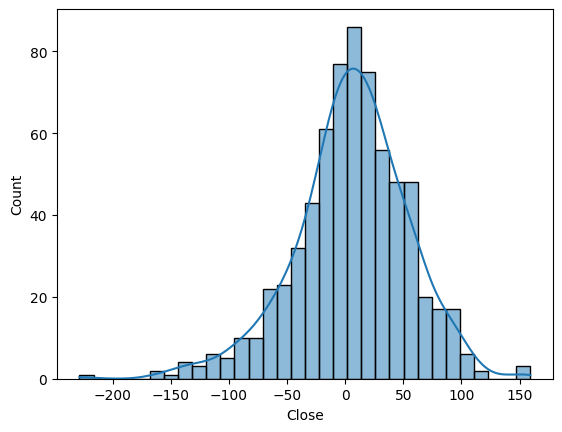

In [39]:
sns.histplot(residual,kde=True)


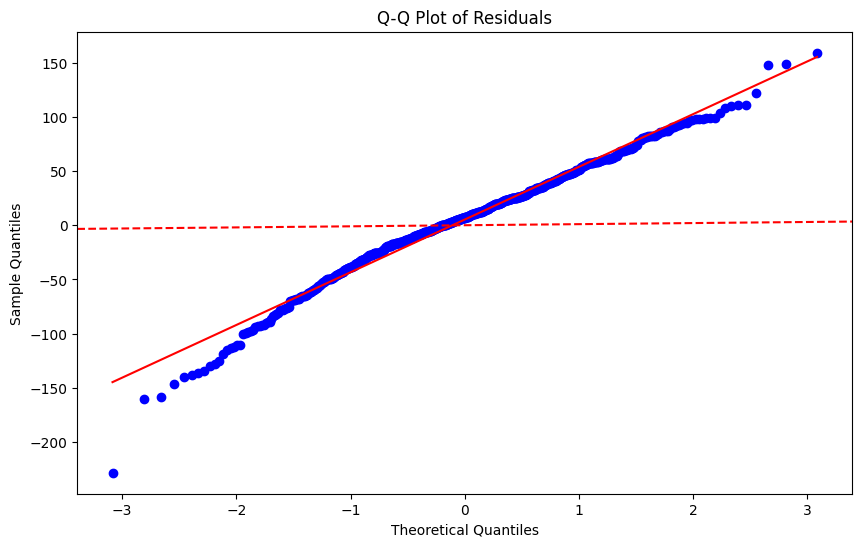

In [40]:
plt.figure(figsize=(10, 6))
stats.probplot(residual, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.axline((0, 0), slope=1, color='red', linestyle='--') 
plt.show()

In [41]:
import pickle

In [42]:
# SAVE
pickle.dump(scaler, open('Scaler.pkl', 'wb'))
pickle.dump(model, open('Ridge.pkl', 'wb'))

# LOAD 
scaler = pickle.load(open('Scaler.pkl', 'rb'))
model = pickle.load(open('Ridge.pkl', 'rb'))


In [43]:
usd_data = pd.read_csv("C://Users//Rohit Mhatre//Downloads//USD_INR Historical Data (1).csv")

In [44]:
usd_data['Date'] = pd.to_datetime(usd_data['Date'],format='%m/%d/%Y')

In [45]:
usd_data.set_index('Date',inplace=True)

In [46]:
usd_data.drop(['Vol.','Change %','Open','High','Low'],axis=1,inplace=True)

In [47]:
usd_data.columns

Index(['Price'], dtype='object')

In [48]:
nifty_df = nifty.loc['2017-01-03':]
nifty_df = nifty_df.copy()

In [49]:
df = pd.merge(nifty_df,usd_data,how='left',left_index=True,right_index=True,suffixes=('_nifty','_usd'))

In [50]:
df.dropna(axis=0,inplace=True)

In [51]:
df.isnull().sum()

Open              0
High              0
Low               0
Close             0
Previous Close    0
Traded Volume     0
Traded Value      0
Price             0
dtype: int64

BACKTESTING 

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'USD Close')

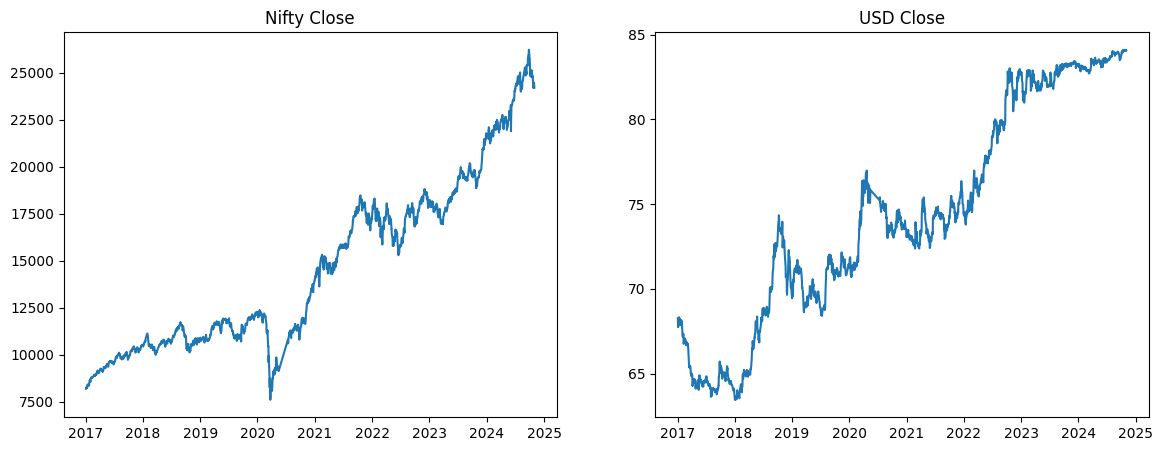

In [53]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(df['Close'])
plt.title('Nifty Close')
plt.subplot(1,2,2)
plt.plot(df['Price'])
plt.title('USD Close')

In [54]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Previous Close', 'Traded Volume',
       'Traded Value', 'Price'],
      dtype='object')

In [55]:
class NIFTY_USD_Strategy:
    def __init__(self,data,window,scaler,model):
        self.data = data
        self.window = window
        self.scaler = scaler
        self.model = model

    def Regime_calculations(self):
        nifty_close = self.data['Close']
        usd_close = self.data['Price']

        nifty_ret = nifty_close.pct_change().dropna()
        usd_ret = usd_close.pct_change().dropna()

        nifty_net = nifty_ret.rolling(window=self.window).mean() / nifty_ret.rolling(window=self.window).std()
        usd_net = usd_ret.rolling(window=self.window).mean() / usd_ret.rolling(window=self.window).std()

        regime = np.where(nifty_net > usd_net,1,0)
        
        return regime.astype(int)

    def model_prediction(self):
        required_cols = ['Open', 'High', 'Low', 'Previous Close', 'Traded Volume', 'Traded Value']
        missing_cols = [col for col in required_cols if col not in self.data.columns]
        
        if missing_cols:
            raise KeyError(f"Missing required columns: {missing_cols}")
        
        features = self.data[required_cols].dropna()
        scaled_data = self.scaler.transform(features)
        prediction = self.model.predict(scaled_data)

        return pd.Series(prediction, index=features.index)

    def apply_strategy(self):
        regimes = self.Regime_calculations()
        model_pred = self.model_prediction()
        min_length = min(len(regimes), len(model_pred), len(self.data))
    
        result = pd.DataFrame({
            'Regimes': regimes[:min_length],  
            'Model_pred': model_pred[:min_length],  
            'Close': self.data['Close'][:min_length]  
        }, index=self.data.index[:min_length])  
    
        return result

In [56]:
import vectorbt as vbt
from functools import partial

In [57]:

def apply_nifty_usd(data, window, scaler, model):

    data = pd.DataFrame(data, columns=['Open', 'High', 'Low', 'Close', 'Previous Close', 
                                           'Traded Volume', 'Traded Value', 'Price'])
    strategy = NIFTY_USD_Strategy(data=data, window=window, scaler=scaler, model=model)
    result = strategy.apply_strategy()
    print(f"Regimes shape: {result['Regimes'].shape}, Model_pred shape: {result['Model_pred'].shape}")
    print(f"Input data shape: {data.shape}, Window: {window}")
    return result['Regimes'], result['Model_pred']

regime,model_pred = apply_nifty_usd(df,20,scaler,model)

Regimes shape: (1718,), Model_pred shape: (1718,)
Input data shape: (1719, 8), Window: 20


In [58]:
regimes_aligned = pd.Series(regime, index=df.index)  
model_pred_aligned = pd.Series(model_pred, index=df.index)  

entry = (regimes_aligned == 1) & (model_pred_aligned > df['Close'])
exit = (regimes_aligned == 0) & (model_pred_aligned < df['Close'])

entry = entry.loc[df.index]
exit = exit.loc[df.index]

BEST WINDOW WITH MAXIMUM TOTAL RETURN IS 20

In [59]:

portfolio = vbt.Portfolio.from_signals(
    df['Close'],
    entries = entry,
    exits = exit,
    sl_stop = 0.05,
    tp_stop = 0.1,
    freq='1D',
    init_cash = 100000,
)
stats = portfolio.stats()
stats

Start                                2017-01-03 00:00:00
End                                  2024-10-31 00:00:00
Period                                1719 days 00:00:00
Start Value                                     100000.0
End Value                                     488687.046
Total Return [%]                              388.687046
Benchmark Return [%]                          195.466447
Max Gross Exposure [%]                             100.0
Total Fees Paid                                      0.0
Max Drawdown [%]                                7.333239
Max Drawdown Duration                  164 days 00:00:00
Total Trades                                          64
Total Closed Trades                                   64
Total Open Trades                                      0
Open Trade PnL                                       0.0
Win Rate [%]                                     79.6875
Best Trade [%]                                 16.379561
Worst Trade [%]                

In [60]:
def improved_portfolio(df, regimes_aligned, model_pred_aligned, window, sl_stop=0.05, tp_stop=0.1, init_cash=100000):
    
    entry = (regimes_aligned == 1) & (model_pred_aligned > df['Close'])
    exit = (regimes_aligned == 0) & (model_pred_aligned < df['Close'])

    
    entry = entry.loc[df.index]
    exit = exit.loc[df.index]
    
    
    portfolio = vbt.Portfolio.from_signals(
        df['Close'],
        entries=entry,
        exits=exit,
        sl_stop=sl_stop,
        tp_stop=tp_stop,
        freq='1D',
        init_cash=init_cash
    )
    
    return portfolio

def calculate_performance_metrics(portfolio):
    
    total_return = portfolio.total_return()
    sharpe_ratio = portfolio.sharpe_ratio()
    max_drawdown = portfolio.max_drawdown()
    
    
    annualized_return = portfolio.annualized_return()
    
    
    return {
        'Total Return': total_return,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown,
        'Annualized Return': annualized_return,
    }

    
window_range = range(20, 101)
results = []

for window in window_range:
    
    portfolio = improved_portfolio(df, regimes_aligned, model_pred_aligned, window)
    
    
    performance = calculate_performance_metrics(portfolio)
    
    
    results.append({
        'Window': window,
        'Total Return': performance['Total Return'],
        'Sharpe Ratio': performance['Sharpe Ratio'],
        'Max Drawdown': performance['Max Drawdown'],
        'Annualized Return': performance['Annualized Return'],
    })

In [61]:
results = pd.DataFrame(results)
best_window = results.loc[results['Total Return'].idxmax()]
print(f"Best window: {best_window['Window']} with Total Return: {best_window['Total Return']}")


Best window: 20.0 with Total Return: 3.886870460002923


In [62]:
plot = portfolio.plot()